## $\text{Task: We give one image to model and it should give 10 similar ones}$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### $\text{Importing libraries}$

In [ ]:
import torch
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as T
from PIL import Image
from pathlib import Path
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms
from sklearn.neighbors import NearestNeighbors

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
device

device(type='cuda')

### $\text{I created a dataset for with task. It consists of 20 images for}$
### $\text{200 classes. I took them from Imaginet}$

In [ ]:
path = '/content/drive/MyDrive/images'

In [ ]:
file_names = list(os.listdir(path))

In [ ]:
path+'/'+file_names[0]

'/content/drive/MyDrive/images/n04275548_102.JPEG'

### $\text{Preprocessing images}$

In [ ]:
preprocessing_image = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
images = []

for file_ in file_names:
    image = Image.open(path+'/'+file_).convert('RGB')
    input_tensor = preprocessing_image(image)
    images.append(input_tensor)

### $\text{I took ResNet50 from Pytorch for this task}$

In [ ]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2).to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 125MB/s]


### $\text{First step: we need to create embeddings for every image in our}$
### $\text{dataset. Let`s run each image through the model}$

In [ ]:
model.eval()

embeddings = []

with torch.no_grad():
    for image in images:
        out = model(image.unsqueeze(0).to(device))
        embeddings.append(out.cpu())

In [ ]:
emb = np.array(embeddings).squeeze(1)
emb.shape

(4000, 1000)

### $\text {Second step: this is the main idea of solution. I used NearestNeighbors with 'cosine' metric to find the nearest images}$

In [ ]:
|knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(emb)

NearestNeighbors(metric='cosine', n_neighbors=10)

### $\text{Inference}$

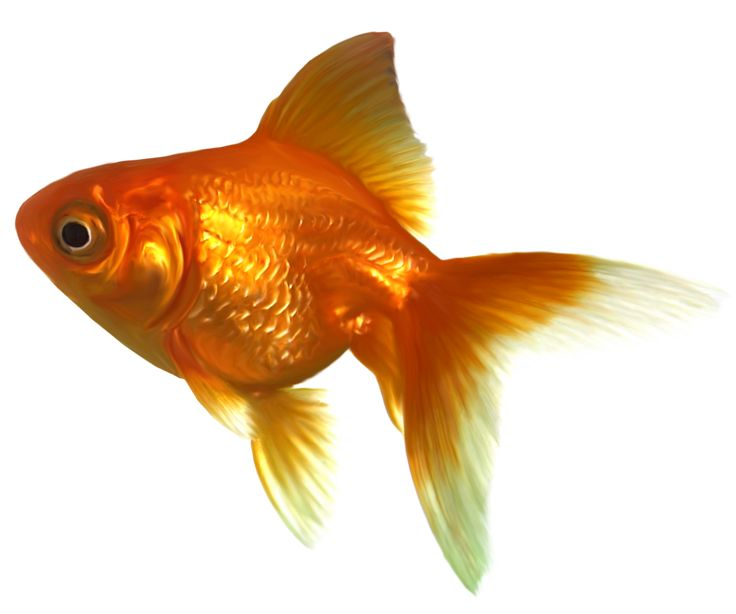

In [ ]:
test_image = Image.open('/content/389a960a2ad127aa50d918bb9adc1177.jpg').convert('RGB')
test_image

In [ ]:
preprocess_image = preprocessing_image(test_image)

In [ ]:
with torch.no_grad():
    test_emb = model(preprocess_image.unsqueeze(0).to(device))
    test_emb_np = np.array(test_emb.cpu())

In [ ]:
distances, indices = knn.kneighbors(test_emb_np)

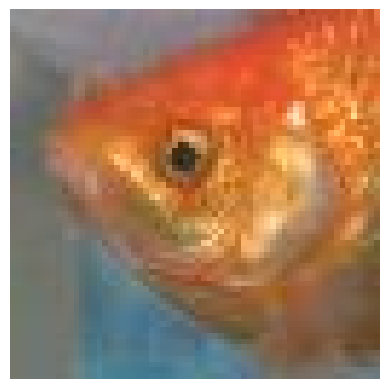

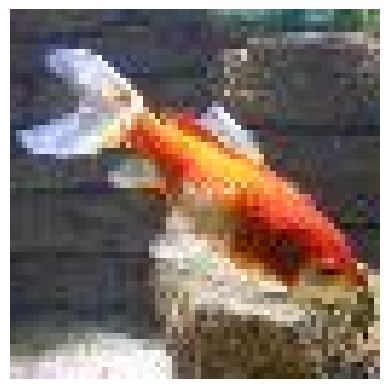

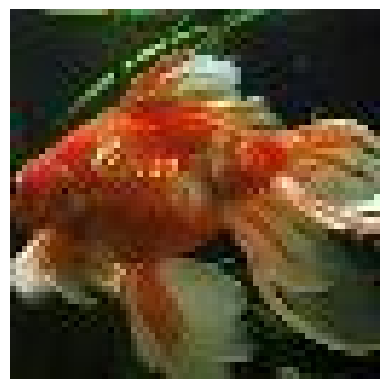

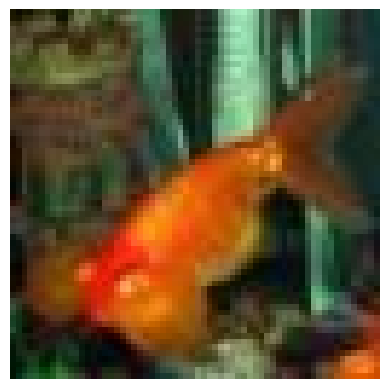

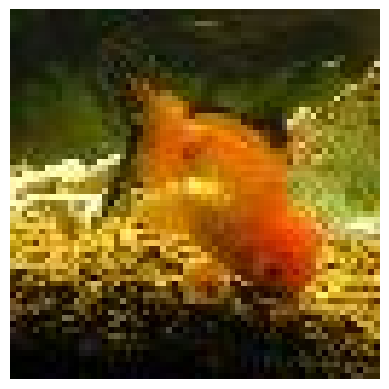

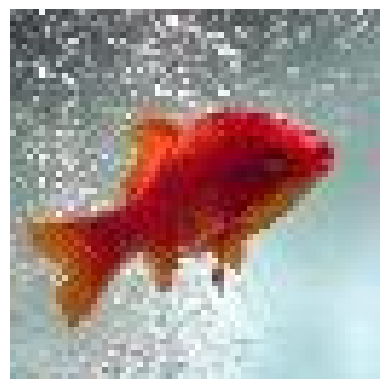

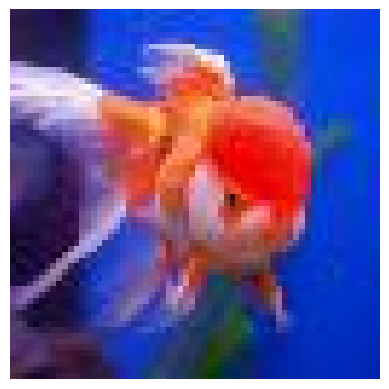

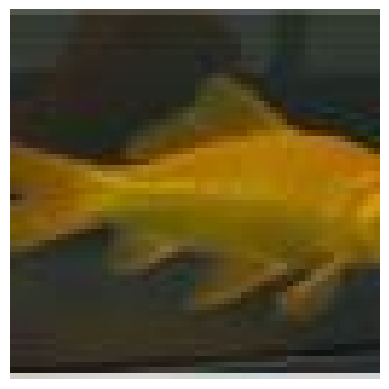

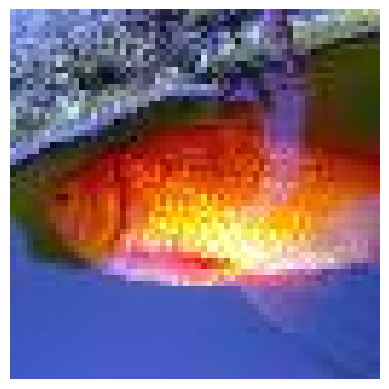

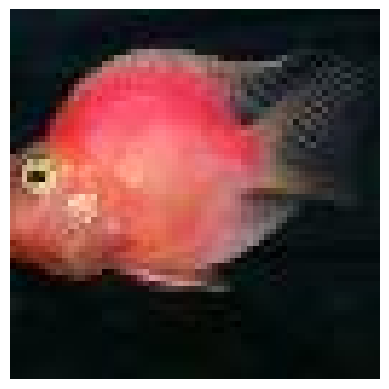

In [ ]:
for index in list(indices.reshape(-1)):
    file_name = file_names[index]
    path_to_image = path + '/' + file_name
    similar_image = Image.open(path_to_image).convert('RGB')

    plt.figure()
    plt.imshow(similar_image)
    plt.axis('off')
    plt.show()